In [2]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
data = sm.datasets.sunspots.load_pandas()
y = data.data
y["YEAR"] = y["YEAR"].astype(int)
y['YEAR'] = pd.to_datetime(y['YEAR'], format='%Y')
y.index = y['YEAR']
del y['YEAR']
y

,SUNACTIVITY
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0
...,...
2004-01-01,40.4
2005-01-01,29.8
2006-01-01,15.2


In [4]:
y = y['SUNACTIVITY'].resample('MS').mean()
y = y.fillna(y.bfill())
                   
y

YEAR
1700-01-01     5.0
1700-02-01    11.0
1700-03-01    11.0
1700-04-01    11.0
1700-05-01    11.0
              ... 
2007-09-01     2.9
2007-10-01     2.9
2007-11-01     2.9
2007-12-01     2.9
2008-01-01     2.9
Freq: MS, Name: SUNACTIVITY, Length: 3697, dtype: float64

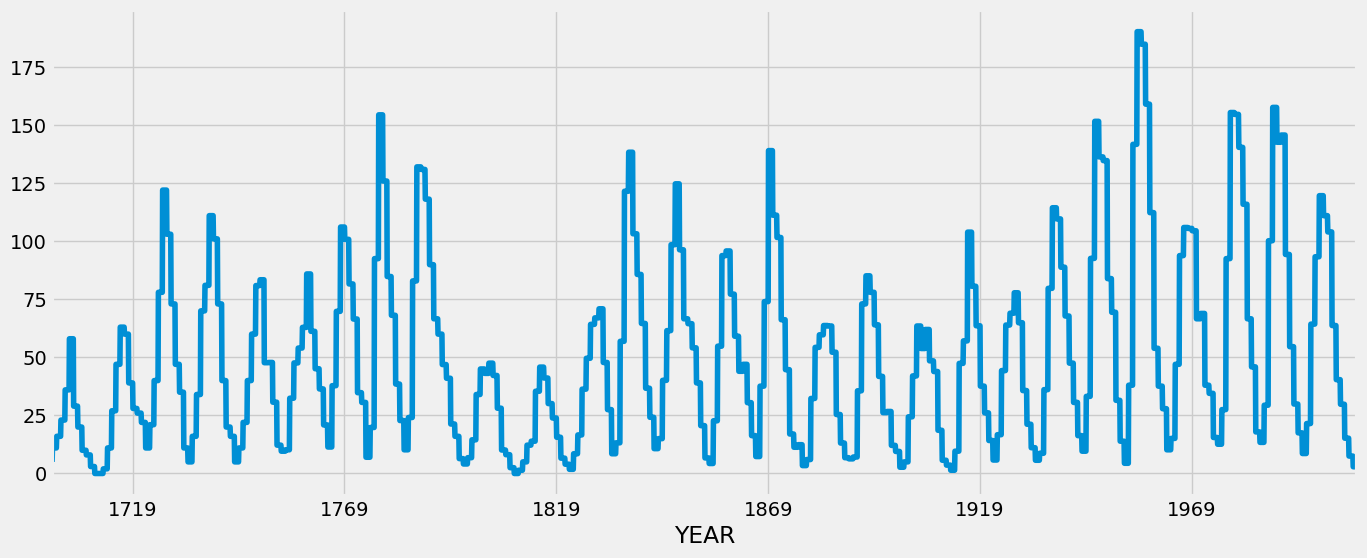

In [5]:
y.plot(figsize=(15, 6))
plt.show()

In [6]:
# Визначення p, d і q у діапазоні 0-2
p = d = q = range(0, 2)
# Генеруємо різні комбінації p, q и q
pdq = list(itertools.product(p, d, q))
# Генеруємо комбінації різних сезонних параметрів p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 
print('Приклади комбінацій параметрів для сезонних ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Приклади комбінацій параметрів для сезонних ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [7]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False)
            results = mod.fit(disp=0)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:41254.52731711659
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:37109.449857723295
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:33876.31768995896
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:32658.079871950285
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:33755.60265359466
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:32553.221814951732
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:32514.789299709708
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:32411.474929018605
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:36758.89703863922
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:32930.87569289717
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:30095.80270993045
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:29247.45913677977
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:29960.037646522207
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:29102.947212740608
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:29146.75590191259
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:29099.594196154485
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:24784.716026880404
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:23595.21901916228
A

In [8]:
mod = sm.tsa.statespace.SARIMAX(y, 
                                order=(1, 0, 1), 
                                seasonal_order=(1, 0, 1, 12), 
                                enforce_stationarity=False, 
                                enforce_invertibility=False)
results = mod.fit(disp=0)

# The best case is: ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:23324.01205914383

In [13]:
results

In [14]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9859      0.004    260.003      0.000       0.978       0.993
ma.L1          0.0070      0.141      0.050      0.960      -0.269       0.283
ar.S.L12       0.4192      0.008     54.560      0.000       0.404       0.434
ma.S.L12       0.2010      0.007     29.690      0.000       0.188       0.214
sigma2        32.8566      0.166    197.709      0.000      32.531      33.182


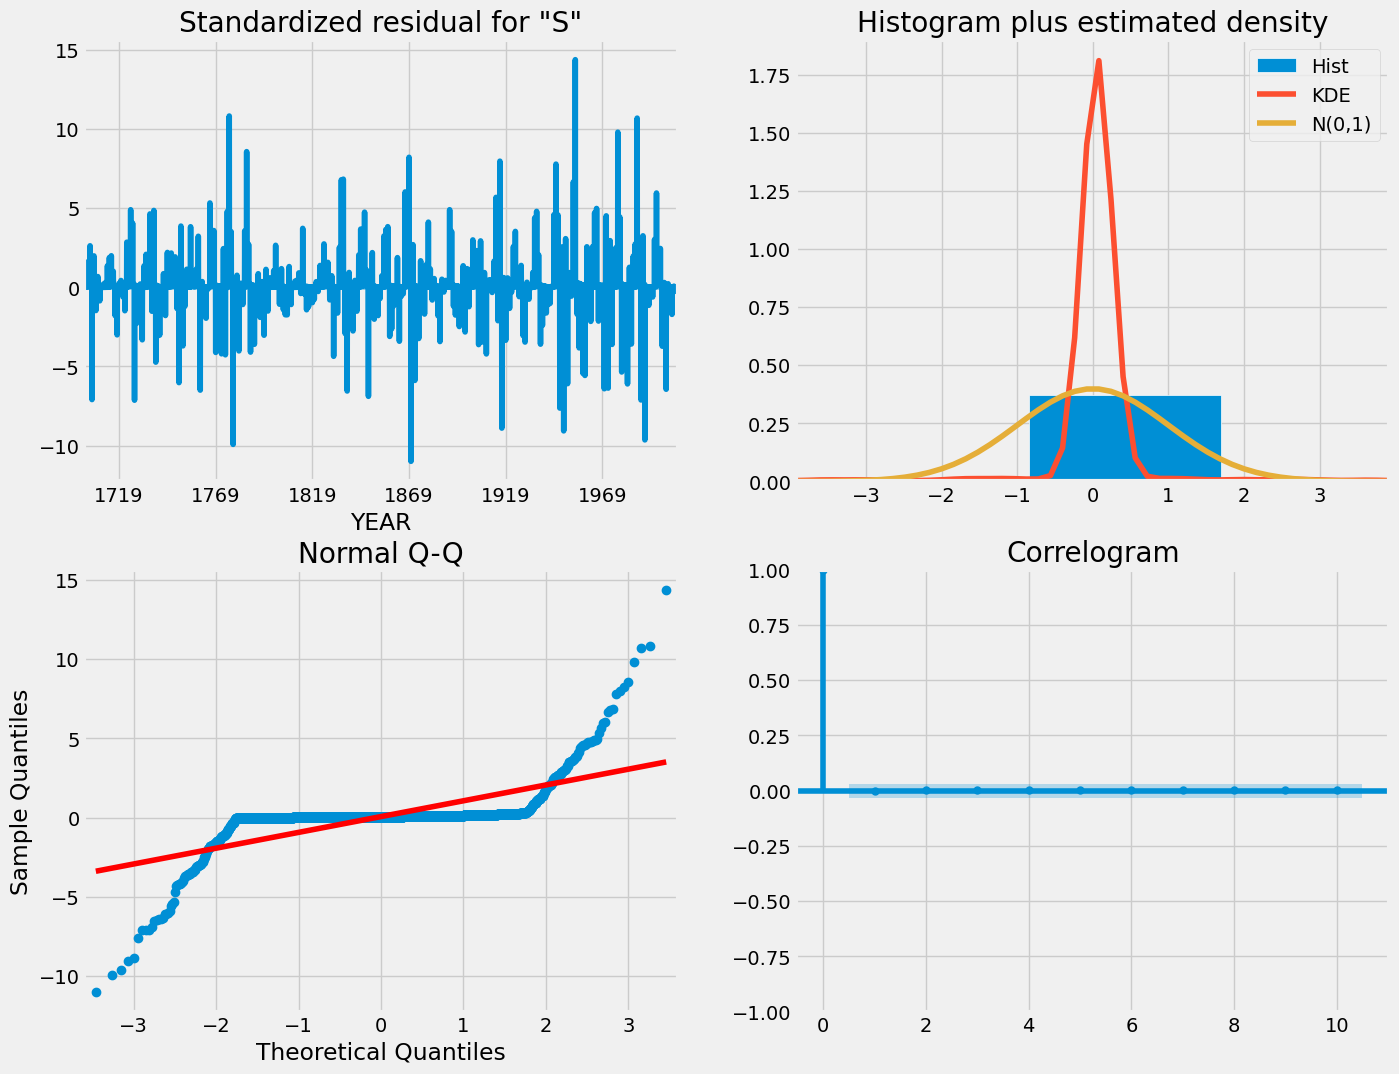

In [15]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()


In [16]:
pred = results.get_prediction(start=pd.to_datetime('2001-01-01'), dynamic=False)
pred_ci = pred.conf_int()

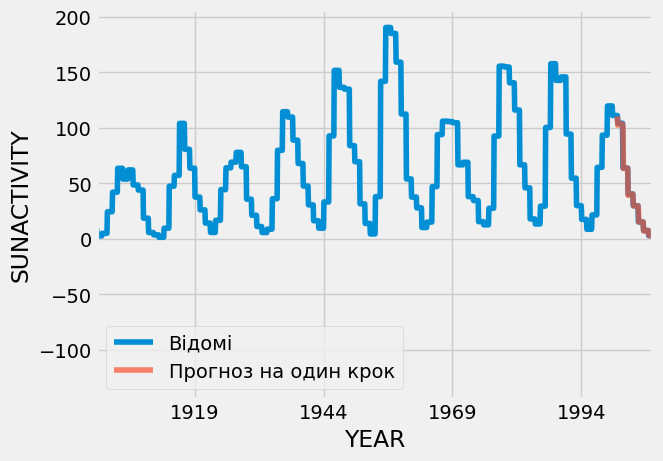

In [25]:
ax = y['1900':].plot(label='Відомі')
pred.predicted_mean.plot(ax=ax, label='Прогноз на один крок', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('YEAR')
ax.set_ylabel('SUNACTIVITY')
plt.legend()
plt.show()

In [26]:
y_forecasted = pred.predicted_mean
y_truth = y['2001-01-01':] # Обчислюємо середню квадртичну похибку
mse = ((y_forecasted - y_truth) ** 2).mean()
print('Середня квадратна похибка прогнозів = {}'.format(round(mse, 2)))


Середня квадратна похибка прогнозів = 17.32


In [19]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2001-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()


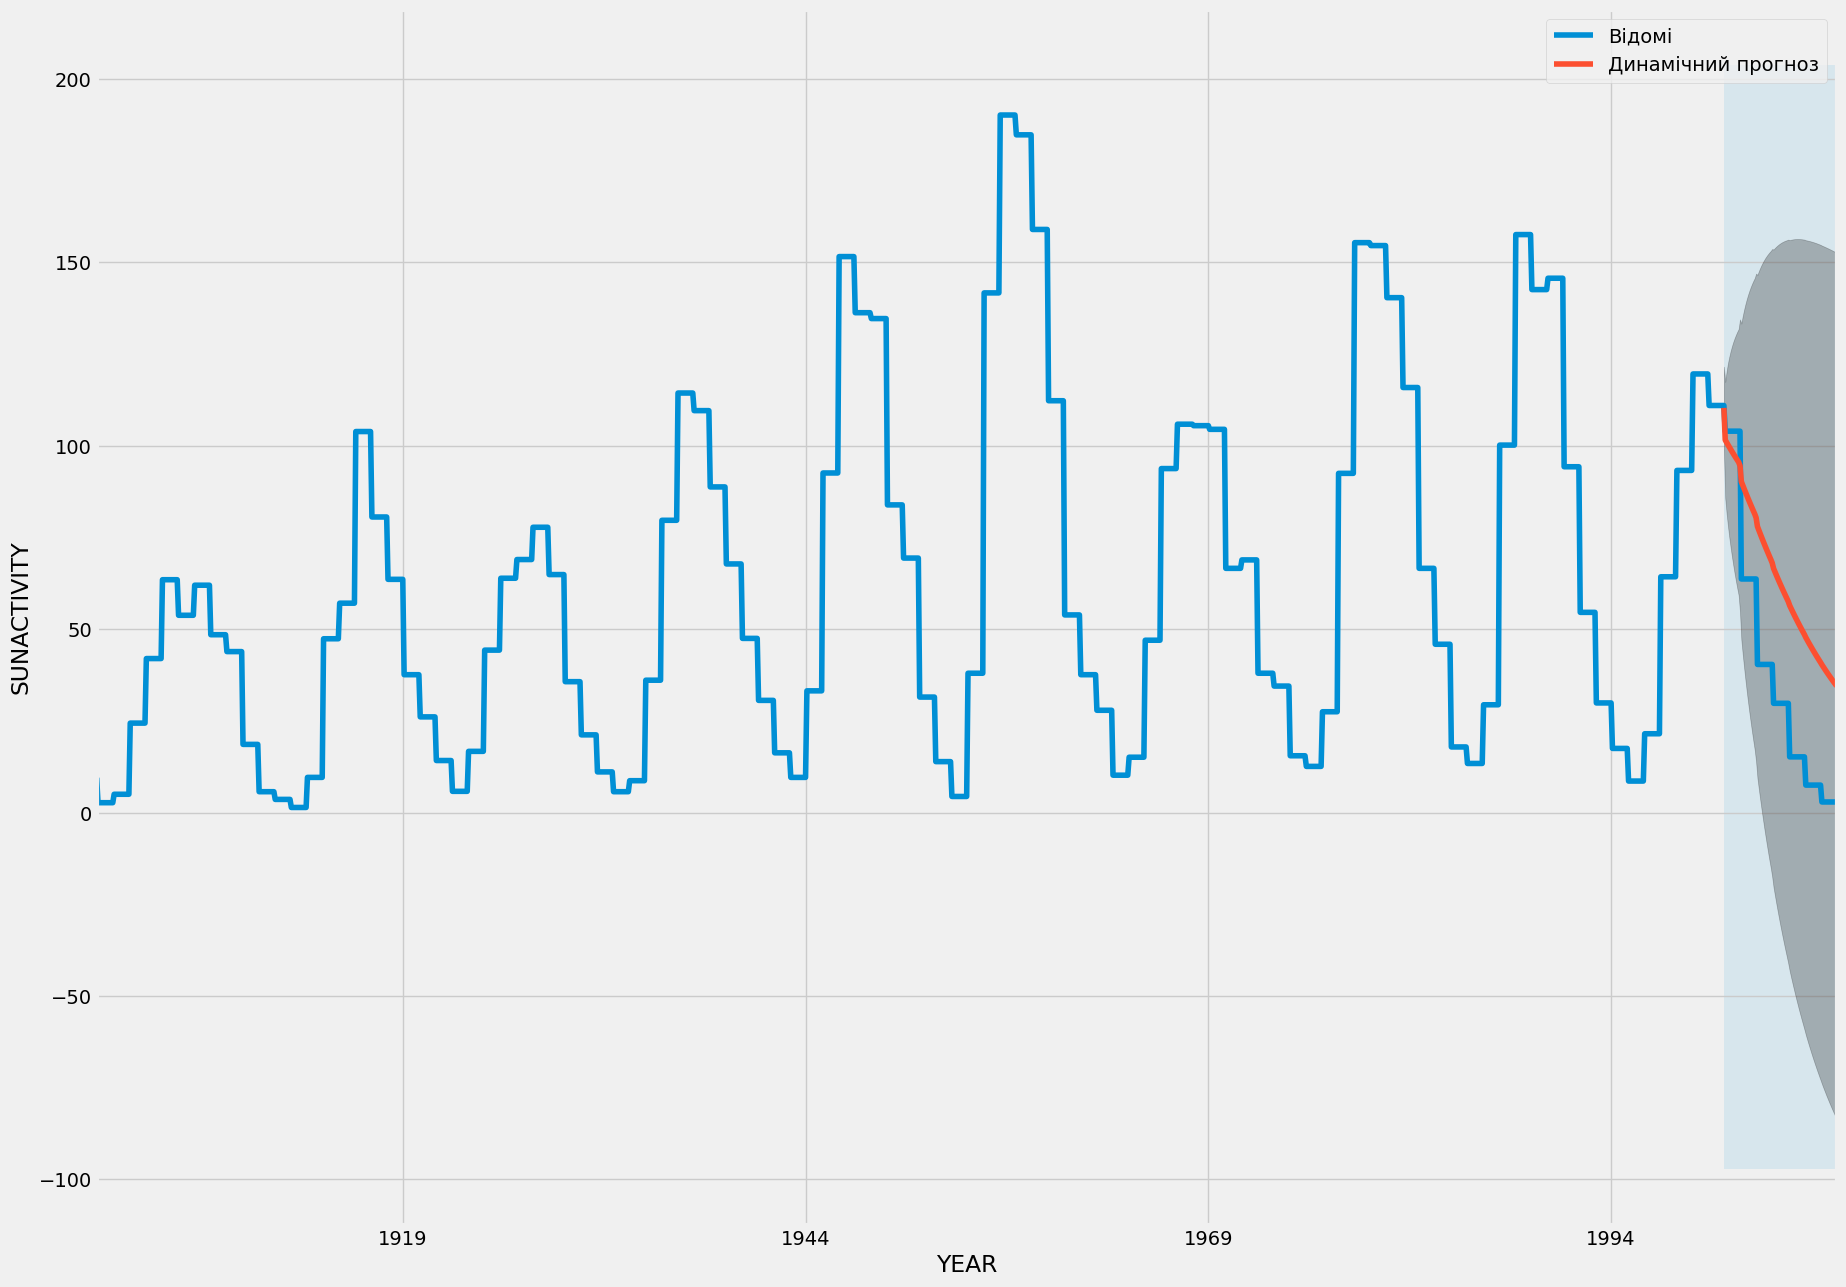

In [27]:
ax = y['1900':].plot(label='Відомі', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Динамічний прогноз', ax=ax)
ax.fill_between(pred_dynamic_ci.index,
pred_dynamic_ci.iloc[:, 0],
pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2001-01-01'), y.index[-1],
alpha=.1, zorder=-1)
ax.set_xlabel('YEAR')
ax.set_ylabel('SUNACTIVITY')
plt.legend()
plt.show()

In [28]:
pred_uc = results.get_forecast(steps=200)

pred_ci = pred_uc.conf_int()

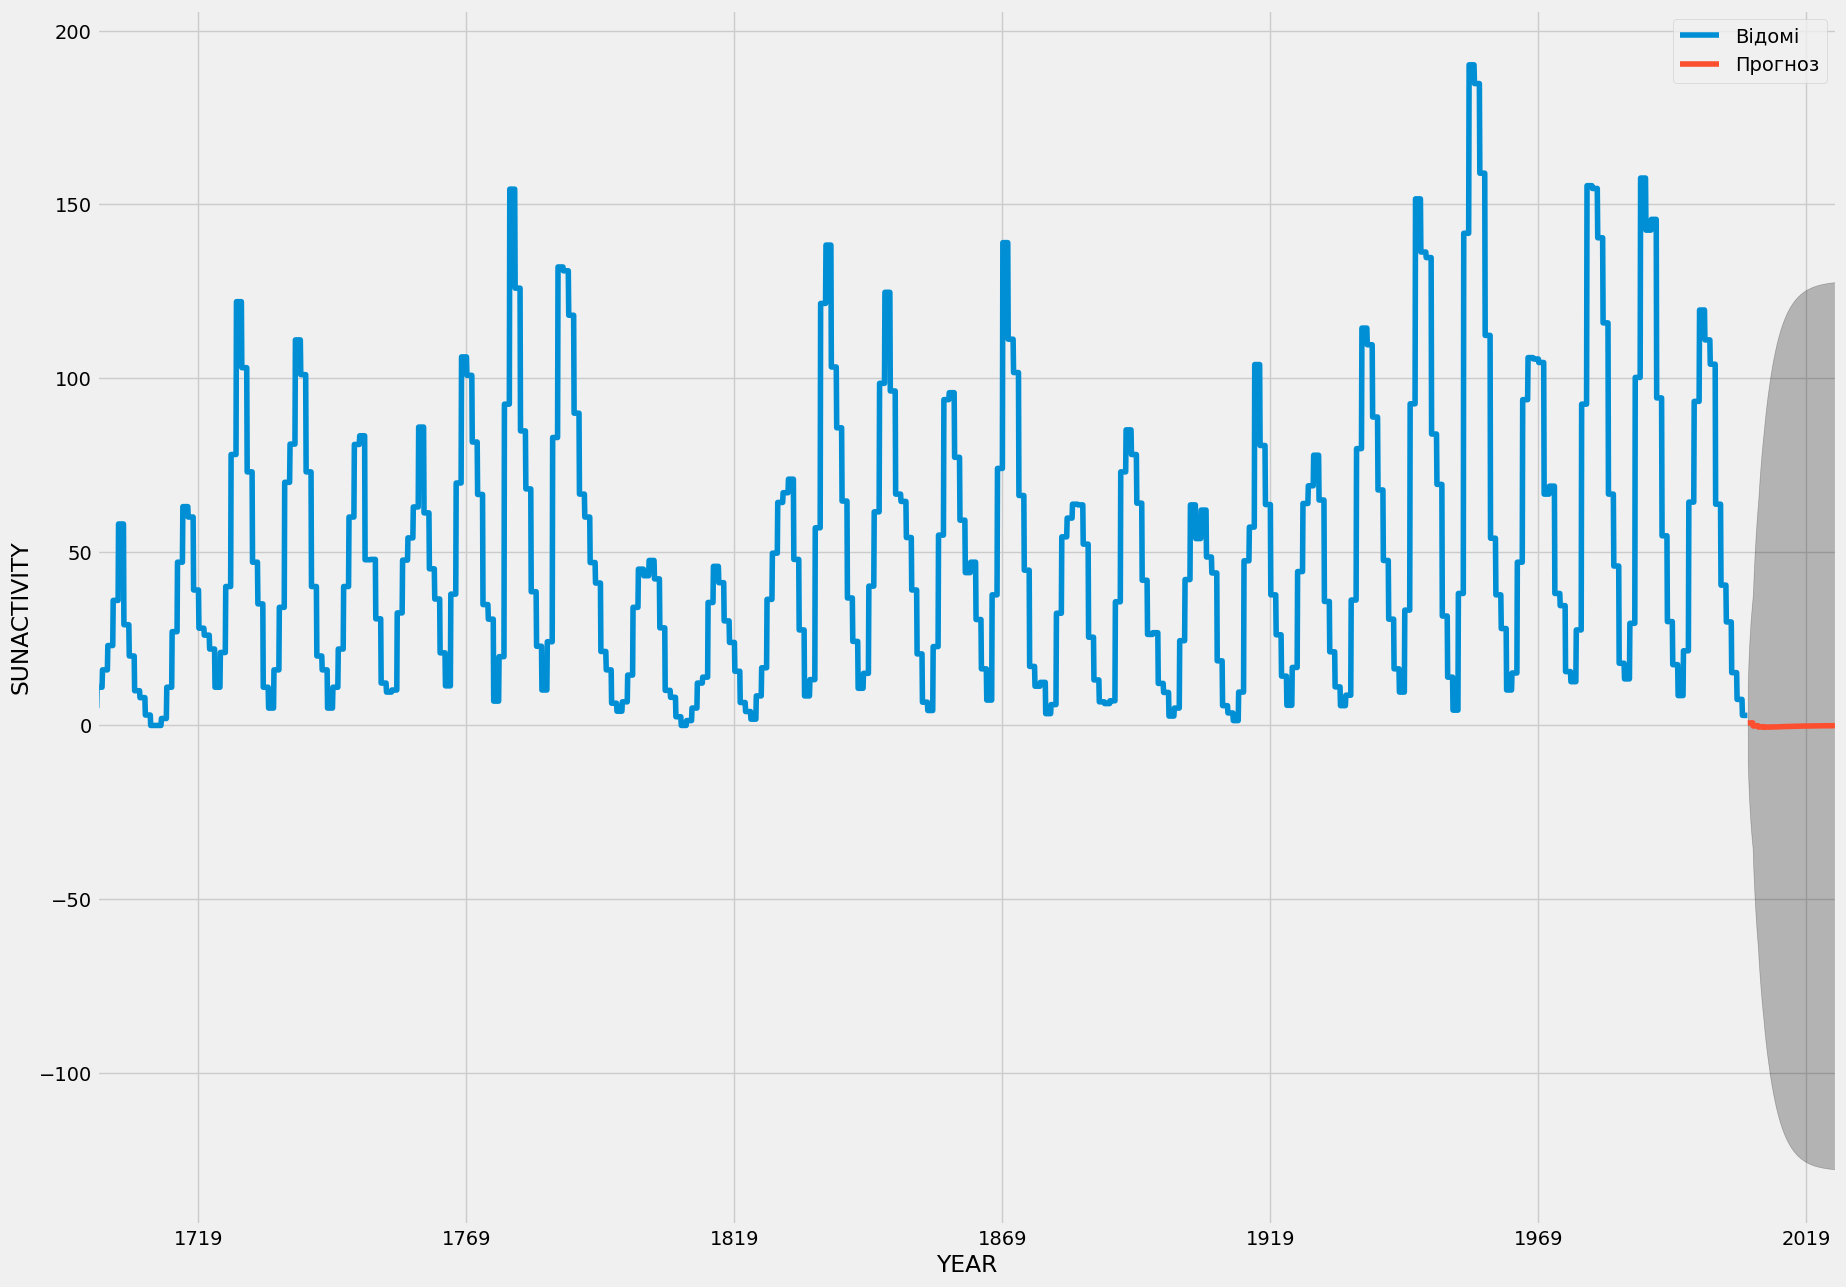

In [29]:
ax = y.plot(label='Відомі', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Прогноз')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('YEAR')
ax.set_ylabel('SUNACTIVITY')
plt.legend()
plt.show()

## Висновок

Згідно отриманих графіків модель SARIMAX не підходить для аналізу цієї вибірки даних. 